In [1]:
%matplotlib inline
from google.cloud import storage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import io
import pandas as pd
import numpy as np

In [2]:
# Define bucket and blob prefix

bucket_name = 'catflap-photos-raw'
prefix = '2020-05-10_13'

In [3]:
# Set up bucket

client = storage.Client()
bucket = client.get_bucket(bucket_name)

In [4]:
# Get list of blob names

blobs = bucket.list_blobs(prefix=prefix)
blob_list = [blob.name for blob in blobs]

In [5]:
# Create dataframe of blob names

blob_df = pd.DataFrame()
blob_df['name'] = pd.Series(blob_list)

print(blob_df.shape)
blob_df.head()

(447, 1)


,name
0,2020-05-10_130006.jpg
1,2020-05-10_130013.jpg
2,2020-05-10_130024.jpg
3,2020-05-10_130031.jpg
4,2020-05-10_130038.jpg


In [6]:
# Start on 

blob_ctr = 0

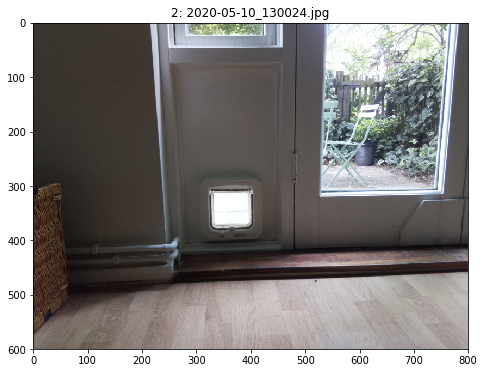

In [10]:
# Show next image

blob_name = blob_df.iloc[blob_ctr]['name']
blob = bucket.blob(blob_name)
blob_str = blob.download_as_string()
bytes_io = io.BytesIO(blob_str)
img = mpimg.imread(bytes_io, format='jpg')

# Show it
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.title(str(blob_ctr) + ': ' + blob_name)

# Move on to next blob
blob_ctr += 1